# Supplementary Figure 9, Ikaros family TF expression by flow cytometry

In Supplementary Figure 9, we plot the mean fluorescence intensity (MFI) of the transcription factors Ikaros, Aiolos, and Helios generated by flow cytometry in response to lenalidomide, bortezomib, or both drugs togeter. Here, we'll generate plots for use in figure panels based on data stored in `06-flow-cytometry/data/`. 

T tests were performed in a notebook in `06-flow-cytometry`.

The files involved in this analysis are not stored in HISE, so sources will be retrieved from within this git repository.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
out_dir <- "output/supp_figure_9"
dir.create(out_dir)

Warning message in dir.create(out_dir):
“'output/supp_figure_9' already exists”


## Read MFIs and helpers for plotting

In [3]:
mfi <- read.csv("../06-flow-cytometry/data/bor-len_combin_Ikaros-Aiolos-Helios_mfi.csv")

In [4]:
mfi_tests <- read.csv("../06-flow-cytometry/output/bor-len_combin_Ikaros-Aiolos-Helios_mfi_stats.csv")

Remove CD4 TEMRA - there are very few cells in this population.

In [5]:
mfi <- mfi %>%
  filter(population != "t_cd4_temra")

In [6]:
mfi_tests <- mfi_tests %>%
  filter(population != "t_cd4_temra")

In [7]:
treat_pos <- data.frame(
    treatment = c("dmso","bor","bor_len", "len"),
    xpos = 1:4,
    label = c("DMSO", "Bor", "Bor+Len", "Len"),
    color = c("#000000", "#F89D49", "#D0DD4D", "#58C0BC")
)

In [8]:
population_pos <- data.frame(
    population = c("t_cd4_naive", "t_cd4_cm", "t_cd4_em", "t_cd4_treg",
                   "t_cd8_naive", "t_cd8_cm", "t_cd8_em", "t_cd8_temra"),
    pop_label = c("CD4 Naive", "CD4 CM", "CD4 EM", "CD4 Treg",
                  "CD8 Naive", "CD8 CM", "CD8 EM", "CD8 TEMRA")
)
population_pos$pop_label <- factor(population_pos$pop_label, levels = population_pos$pop_label)

## Calculate T tests and other stats for plotting

## Barplots

In [9]:
bar_data <- mfi %>%
  group_by(treatment, timepoint, population, target) %>%
  summarise(mean_mfi = mean(mfi),
            median_mfi = median(mfi),
            sd_mfi = sd(mfi),
            q25 = quantile(mfi, 0.25),
            q75 = quantile(mfi, 0.75),
            .groups = "keep") %>%
  left_join(treat_pos) %>%
  left_join(population_pos)

Joining with `by = join_by(treatment)`
Joining with `by = join_by(population)`


In [10]:
mfi_tests <- mfi_tests %>%
  left_join(treat_pos) %>%
  left_join(population_pos) %>%
  mutate(color = ifelse(adjP < 0.05, "black", "gray50")) %>%
  mutate(label = round(adjP, 4)) %>%
  mutate(label = ifelse(treatment == "dmso",
                        paste0("*",label),
                        label))

Joining with `by = join_by(treatment)`
Joining with `by = join_by(population)`


## Ikaros

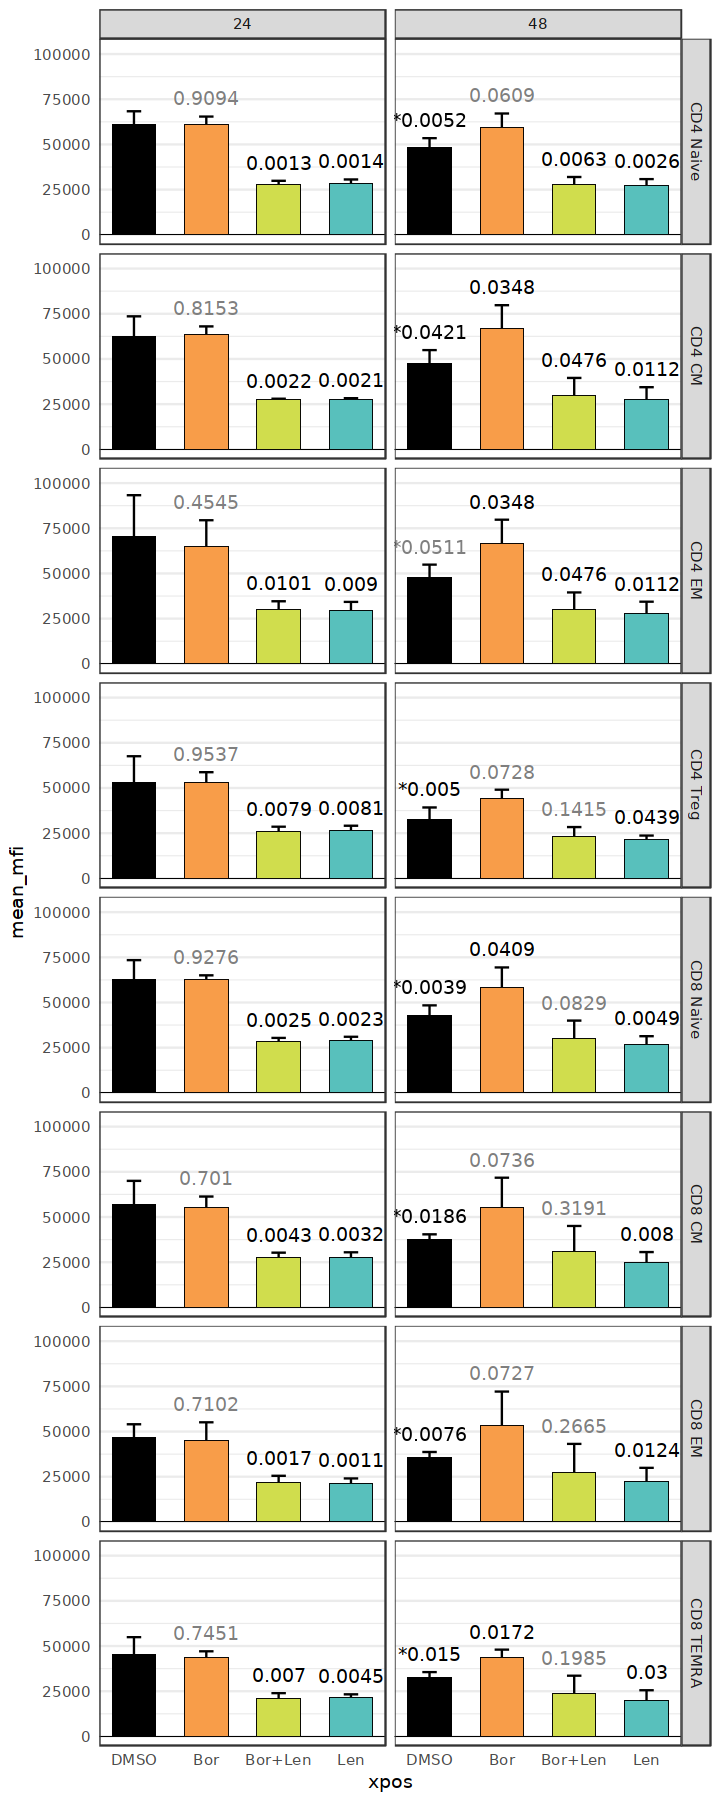

In [11]:
options(repr.plot.width = 6, repr.plot.height = 15)

plot_data <- bar_data %>%
  filter(target == "Ikaros")
plot_tests <- mfi_tests %>%
  filter(target == "Ikaros")

ikaros_plot <- ggplot() +
  geom_hline(
      data = data.frame(y = 0),
      aes(yintercept = y),
      linewidth = 0.2
  ) +
  geom_errorbar(
      data = plot_data,
      aes(x = xpos,
          ymin = mean_mfi - sd_mfi,
          ymax = mean_mfi + sd_mfi),
      width = 0.2
  )  +
  geom_col(
      data = plot_data,
      aes(x = xpos,
          y = mean_mfi,
          fill = color),
      width = 0.6,
      color = "black",
      linewidth = 0.2
  )  +
  geom_text(
      data = plot_tests,
      aes(x = xpos,
          y = (mean_mfi + sd_mfi) + 1e4,
          label = label,
          color = color)
  ) +
  scale_color_identity() +
  scale_fill_identity() +
  scale_x_continuous(
      breaks = treat_pos$xpos,
      labels = treat_pos$label
  ) +
  facet_grid(
      rows = vars(pop_label),
      cols = vars(timepoint)
  ) +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank())
ikaros_plot

In [12]:
out_file <- paste0("bor-len_combin_ikaros_mfi_barplots_", Sys.Date(), ".pdf")
ggsave(
    file.path(out_dir, out_file),
    ikaros_plot,
    width = 6, height = 15
)

## Aiolos

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


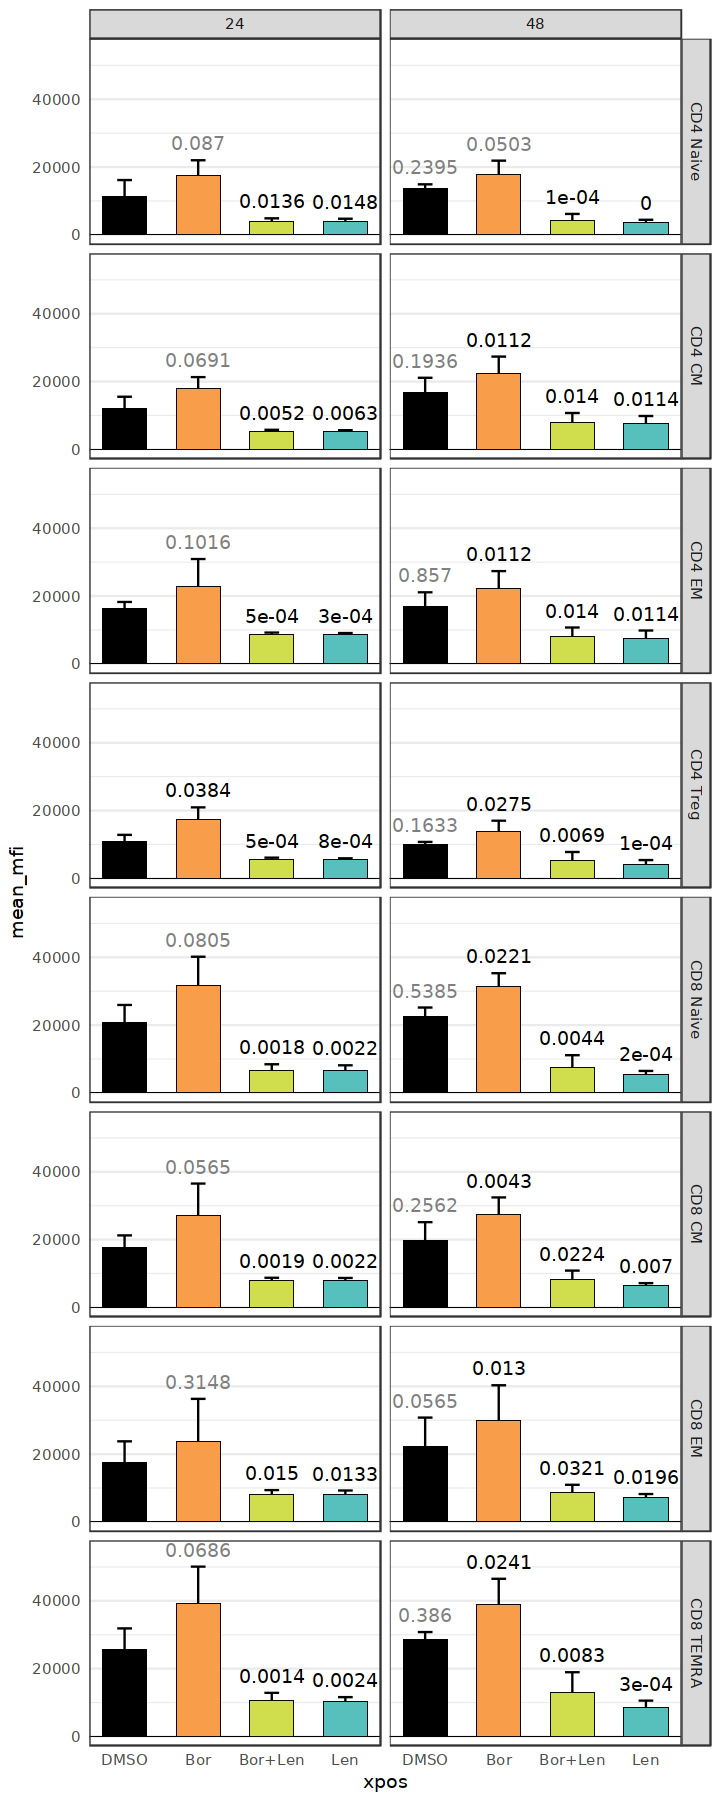

In [13]:
options(repr.plot.width = 6, repr.plot.height = 15)

plot_data <- bar_data %>%
  filter(target == "Aiolos")
plot_tests <- mfi_tests %>%
  filter(target == "Aiolos")

aiolos_plot <- ggplot() +
  geom_hline(
      data = data.frame(y = 0),
      aes(yintercept = y),
      linewidth = 0.2
  ) +
  geom_errorbar(
      data = plot_data,
      aes(x = xpos,
          ymin = mean_mfi - sd_mfi,
          ymax = mean_mfi + sd_mfi),
      width = 0.2
  )  +
  geom_col(
      data = plot_data,
      aes(x = xpos,
          y = mean_mfi,
          fill = color),
      width = 0.6,
      color = "black",
      linewidth = 0.2
  )  +
  geom_text(
      data = plot_tests,
      aes(x = xpos,
          y = (mean_mfi + sd_mfi) + 5e3,
          label = round(adjP, 4),
          color = color)
  ) +
  scale_color_identity() +
  scale_fill_identity() +
  scale_x_continuous(
      breaks = treat_pos$xpos,
      labels = treat_pos$label
  ) +
  facet_grid(
      rows = vars(pop_label),
      cols = vars(timepoint)
  ) +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank())
aiolos_plot

In [14]:
out_file <- paste0("bor-len_combin_aiolos_mfi_barplots_", Sys.Date(), ".pdf")
ggsave(
    file.path(out_dir, out_file),
    aiolos_plot,
    width = 6, height = 15
)

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


## Helios

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


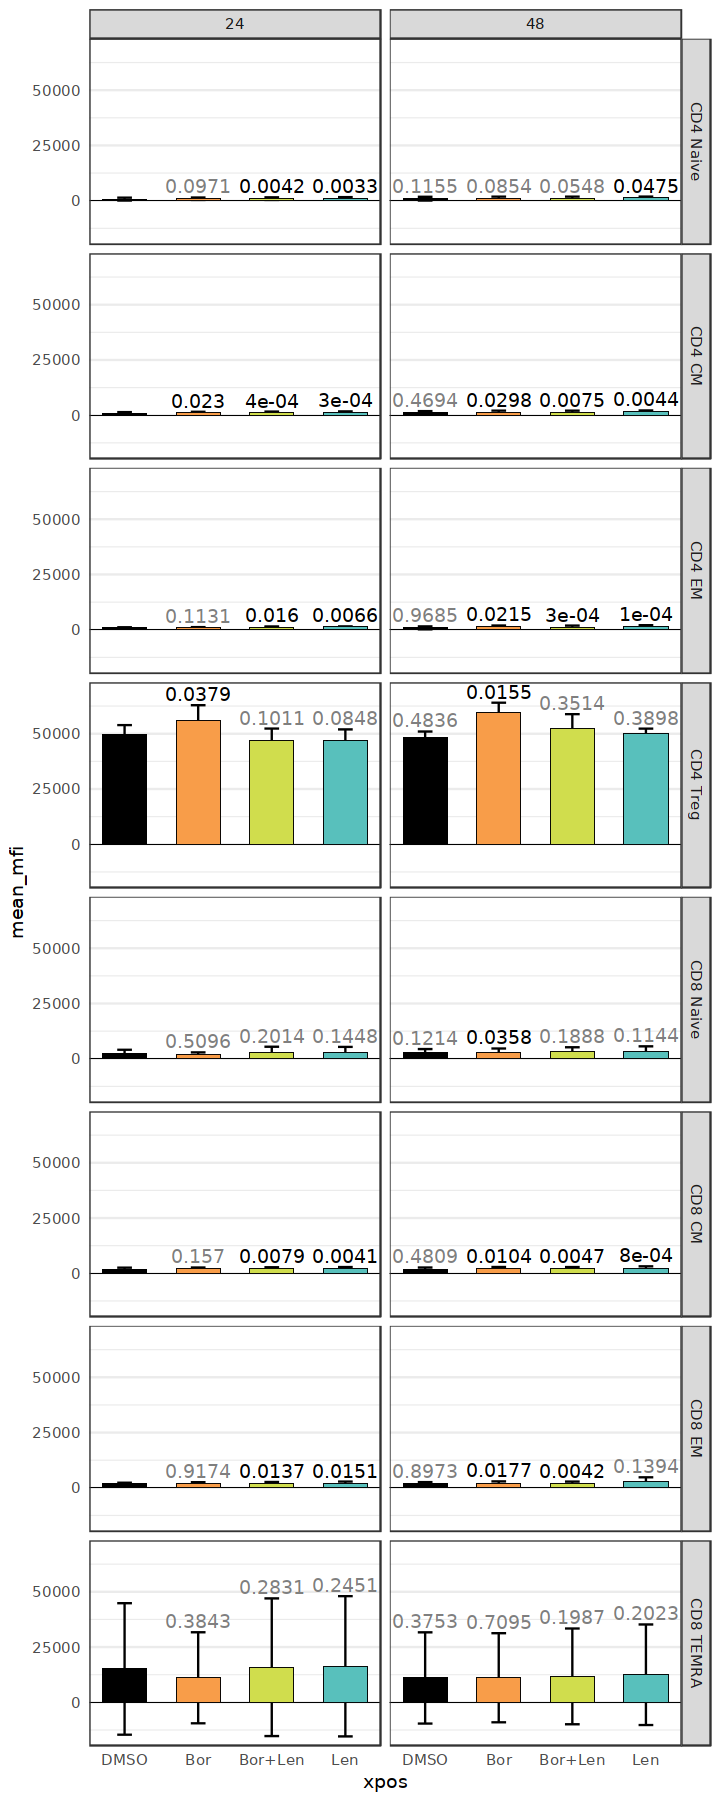

In [15]:
options(repr.plot.width = 6, repr.plot.height = 15)

plot_data <- bar_data %>%
  filter(target == "Helios")
plot_tests <- mfi_tests %>%
  filter(target == "Helios")

helios_plot <- ggplot() +
  geom_hline(
      data = data.frame(y = 0),
      aes(yintercept = y),
      linewidth = 0.2
  ) +
  geom_errorbar(
      data = plot_data,
      aes(x = xpos,
          ymin = mean_mfi - sd_mfi,
          ymax = mean_mfi + sd_mfi),
      width = 0.2
  )  +
  geom_col(
      data = plot_data,
      aes(x = xpos,
          y = mean_mfi,
          fill = color),
      width = 0.6,
      color = "black",
      linewidth = 0.2
  )  +
  geom_text(
      data = plot_tests,
      aes(x = xpos,
          y = (mean_mfi + sd_mfi) + 5e3,
          label = round(adjP, 4),
          color = color)
  ) +
  scale_color_identity() +
  scale_fill_identity() +
  scale_x_continuous(
      breaks = treat_pos$xpos,
      labels = treat_pos$label
  ) +
  facet_grid(
      rows = vars(pop_label),
      cols = vars(timepoint)
  ) +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank())

helios_plot

In [16]:
out_file <- paste0("bor-len_combin_helios_mfi_barplots_", Sys.Date(), ".pdf")
ggsave(
    file.path(out_dir, out_file),
    helios_plot,
    width = 6, height = 15
)

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


## Helios with free Y scale

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


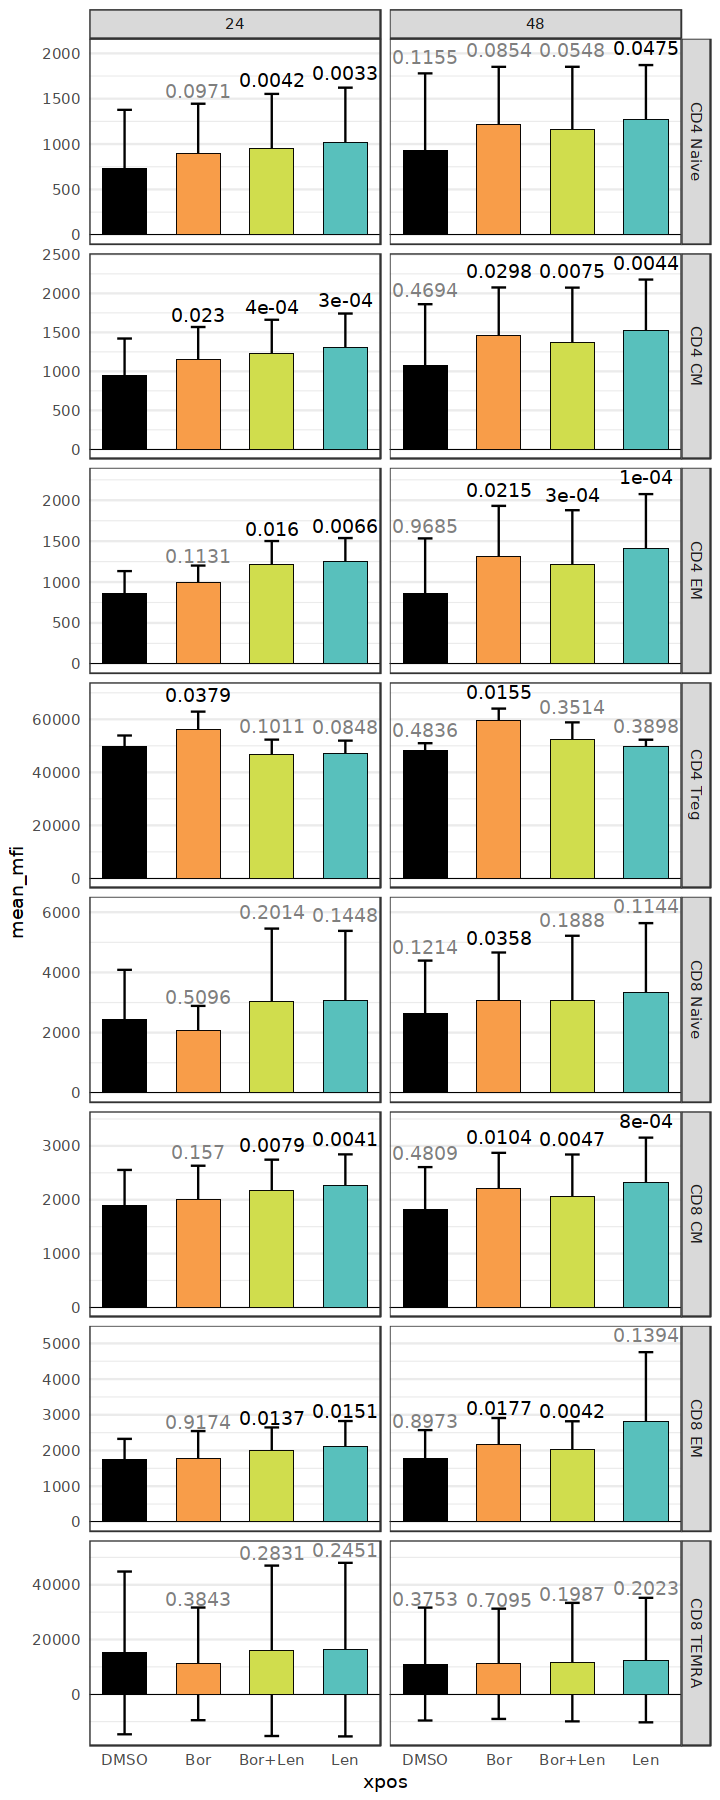

In [17]:
options(repr.plot.width = 6, repr.plot.height = 15)

plot_data <- bar_data %>%
  filter(target == "Helios")
plot_tests <- mfi_tests %>%
  filter(target == "Helios")

helios_plot_free_y <- ggplot() +
  geom_hline(
      data = data.frame(y = 0),
      aes(yintercept = y),
      linewidth = 0.2
  ) +
  geom_errorbar(
      data = plot_data,
      aes(x = xpos,
          ymin = mean_mfi - sd_mfi,
          ymax = mean_mfi + sd_mfi),
      width = 0.2
  )  +
  geom_col(
      data = plot_data,
      aes(x = xpos,
          y = mean_mfi,
          fill = color),
      width = 0.6,
      color = "black",
      linewidth = 0.2
  )  +
  geom_text(
      data = plot_tests,
      aes(x = xpos,
          y = (mean_mfi + sd_mfi) * 1.1,
          label = round(adjP, 4),
          color = color)
  ) +
  scale_color_identity() +
  scale_fill_identity() +
  scale_x_continuous(
      breaks = treat_pos$xpos,
      labels = treat_pos$label
  ) +
  facet_grid(
      rows = vars(pop_label),
      cols = vars(timepoint),
      scales = "free_y"
  ) +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank())

helios_plot_free_y

In [18]:
out_file <- paste0("bor-len_combin_helios_free-y_mfi_barplots_", Sys.Date(), ".pdf")
ggsave(
    file.path(out_dir, out_file),
    helios_plot_free_y,
    width = 6, height = 15
)

Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


In [19]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.3 dplyr_1.1.3  

loaded via a namespace (and not attached):
 [1] crayon_1.5.2      vctrs_0.6.3       cli_3.6.1         rlang_1.1.1      
 [5] generics_0.1.3    textshaping_0.3.6 Cairo_1.6-1       jsonlite_1.8.7   
 [9] labeling_0.4.3    glue_1.6.2        colorspace_2.1-0  htmltools_0.5.6  
[13] I